# **Toolbox Loading**

In [1]:
#Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

#Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR

#Model evaluation
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

#Warnings
import warnings
warnings.filterwarnings('ignore')

# ***Data Exploration***

In [2]:
#loading dataset
data = pd.read_csv(r'C:\Users\USER1\Desktop\Sleep_Efficiency.csv')
data.shape

(452, 15)

In [3]:
#checking columnsin dataset
data.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [4]:
#showing top five rows in dataset
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
#showing information regardinng dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [6]:
#statistical description of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,452.0,226.500000,130.625419,1.0,113.7500,226.50,339.25,452.00
Age,452.0,40.285398,13.172250,9.0,29.0000,40.00,52.00,69.00
Sleep duration,452.0,7.465708,0.866625,5.0,7.0000,7.50,8.00,10.00
Sleep efficiency,452.0,0.788916,0.135237,0.5,0.6975,0.82,0.90,0.99
REM sleep percentage,452.0,23.002212,3.972466,15.0,20.0000,22.00,27.00,30.00
Deep sleep percentage,452.0,52.960177,15.561713,20.0,51.2500,60.00,63.00,75.00
Light sleep percentage,452.0,24.831858,15.150774,7.0,15.0000,18.00,27.25,56.00
Awakenings,432.0,1.641204,1.356762,0.0,1.0000,1.00,3.00,4.00
Caffeine consumption,427.0,23.653396,30.202785,0.0,0.0000,25.00,50.00,200.00
Alcohol consumption,436.0,1.245413,1.643336,0.0,0.0000,0.00,2.00,5.00


# ***Data Cleaning***

In [7]:
#checking for null values
data.isnull().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64

In [8]:
#filling null values with mean or median
data['Awakenings'].fillna(data['Awakenings'].mean(),inplace=True)
data['Caffeine consumption'].fillna(data['Caffeine consumption'].median(),inplace=True)
data['Alcohol consumption'].fillna(data['Alcohol consumption'].mean(),inplace=True)
data['Exercise frequency'].fillna(data['Exercise frequency'].mean(),inplace=True)

In [9]:
#checking for null values
print(f'Any NaN values? {data.isna().values.any()}')

Any NaN values? False


In [10]:
#checking dataset for duplicates
print(f'Any duplicates? {data.duplicated().values.any()}')

Any duplicates? False


In [11]:
# Calculate the IQR for each column in the dataframe
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Print the shape of the dataframe before removing the outliers
print("The shape of the dataframe before removing the outliers is " + str(data.shape))
# Remove the outliers from the dataframe
data = data[~((data < (Q1 - 2.3 * IQR)) |(data > (Q3 + 2.3 * IQR))).any(axis=1)]
# Print the shape of the dataframe after removing the outliers
print("The shape of the dataframe after removing the outliers is " + str(data.shape))

The shape of the dataframe before removing the outliers is (452, 15)
The shape of the dataframe after removing the outliers is (410, 15)


In [12]:
#dropping irrelevant columns
data = data.drop(columns=['ID','Bedtime','Wakeup time'])

In [13]:
#encoding gender feature
data.replace({'Male':1,'Female':0}, inplace=True)
data.replace({'Yes': 1, 'No':0},inplace=True)

# ***Exploratory Data Analysis***


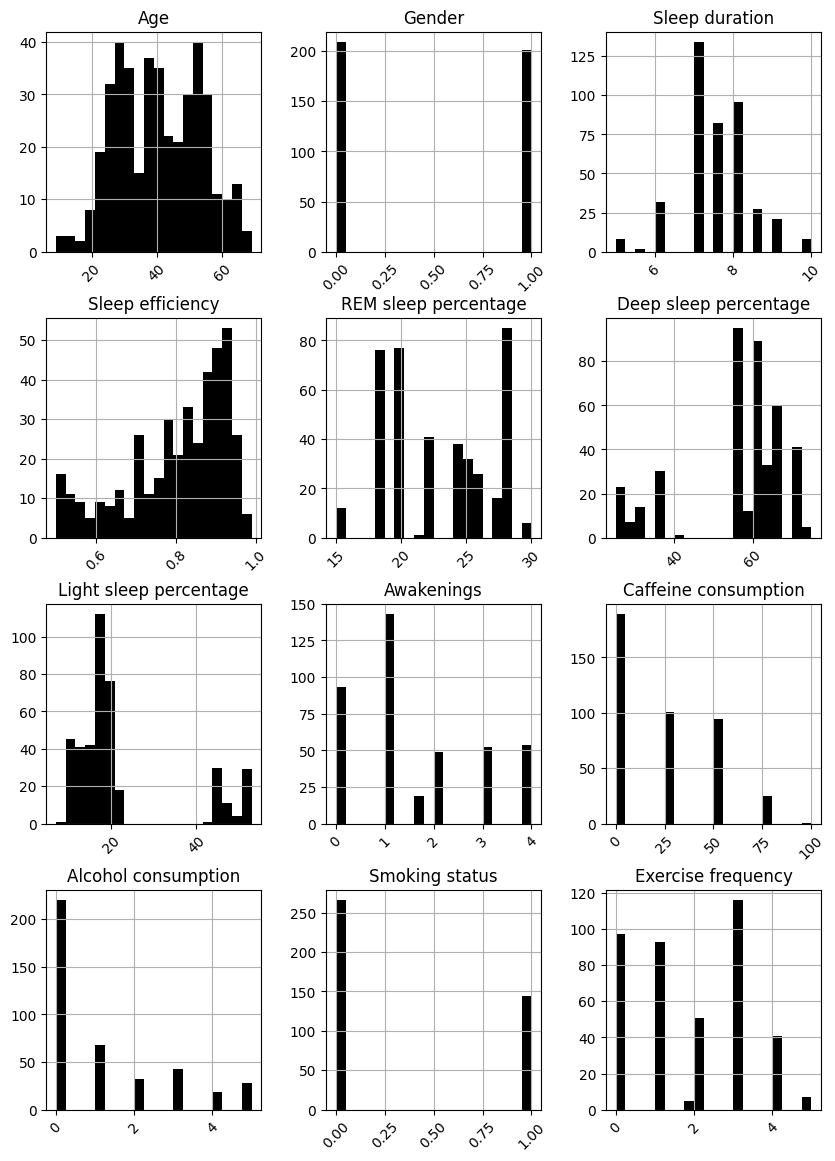

In [14]:
#histogram of numeric features in dataset
data.hist(figsize=(10,14), xrot=45,color = 'k',bins =20)
plt.show()

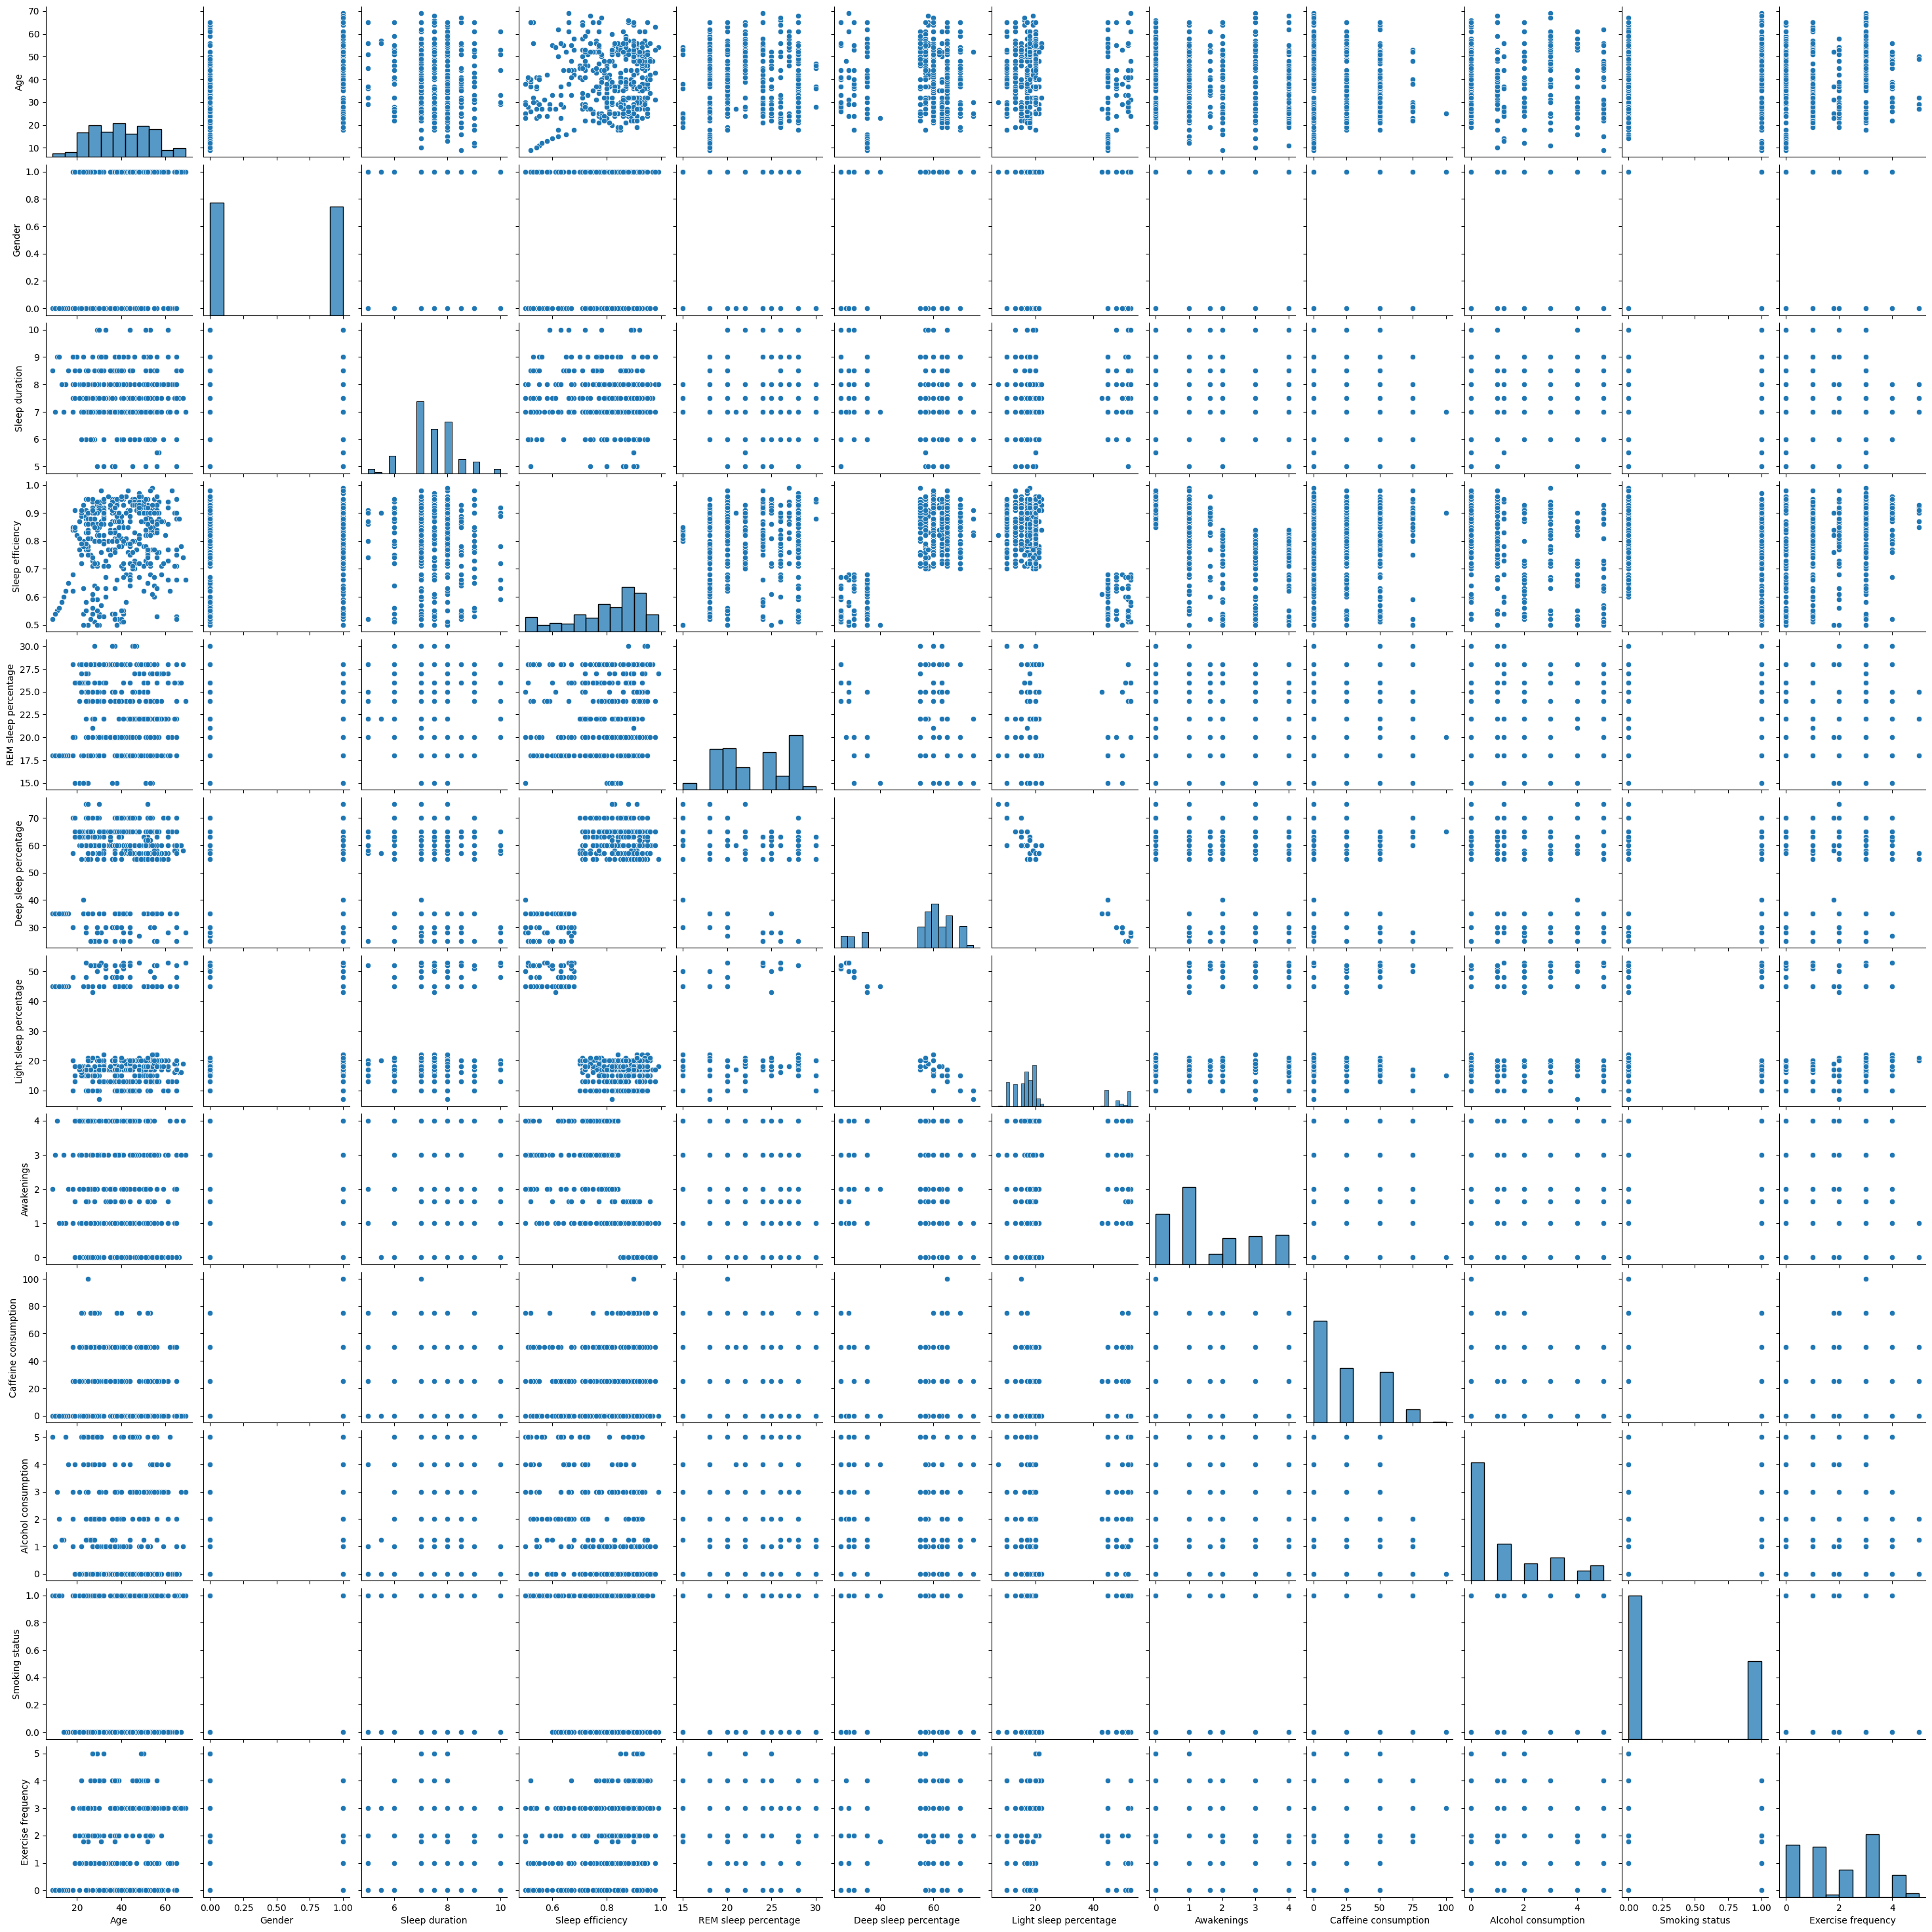

In [15]:
#pairplot showing relationship between columns in datset
sns.pairplot(data)
plt.show()

# ***Feature Engineering***

In [16]:
#re-arranging dataset columns
data = data.reindex(columns=['Age', 'Gender', 'Sleep duration',
       'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency','Sleep efficiency'])

In [17]:
data.head()

,Age,Gender,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Sleep efficiency
0,65,0,6.0,18,70,10,0.0,0.0,0.0,1,3.0,0.88
1,69,1,7.0,24,28,53,3.0,0.0,3.0,1,3.0,0.66
2,40,0,8.0,20,70,10,1.0,0.0,0.0,0,3.0,0.89
3,40,0,6.0,28,25,52,3.0,50.0,5.0,1,1.0,0.51
4,57,1,8.0,27,55,18,3.0,0.0,3.0,0,3.0,0.76


In [18]:
#correlations among features in dataset
correlation = data.corr()
print(correlation['Sleep efficiency'].sort_values(ascending=False))

Sleep efficiency          1.000000
Deep sleep percentage     0.756361
Exercise frequency        0.269453
REM sleep percentage      0.153964
Age                       0.136410
Gender                    0.048017
Caffeine consumption      0.000523
Sleep duration           -0.037069
Smoking status           -0.316108
Alcohol consumption      -0.423981
Awakenings               -0.545476
Light sleep percentage   -0.792355
Name: Sleep efficiency, dtype: float64


<AxesSubplot:>

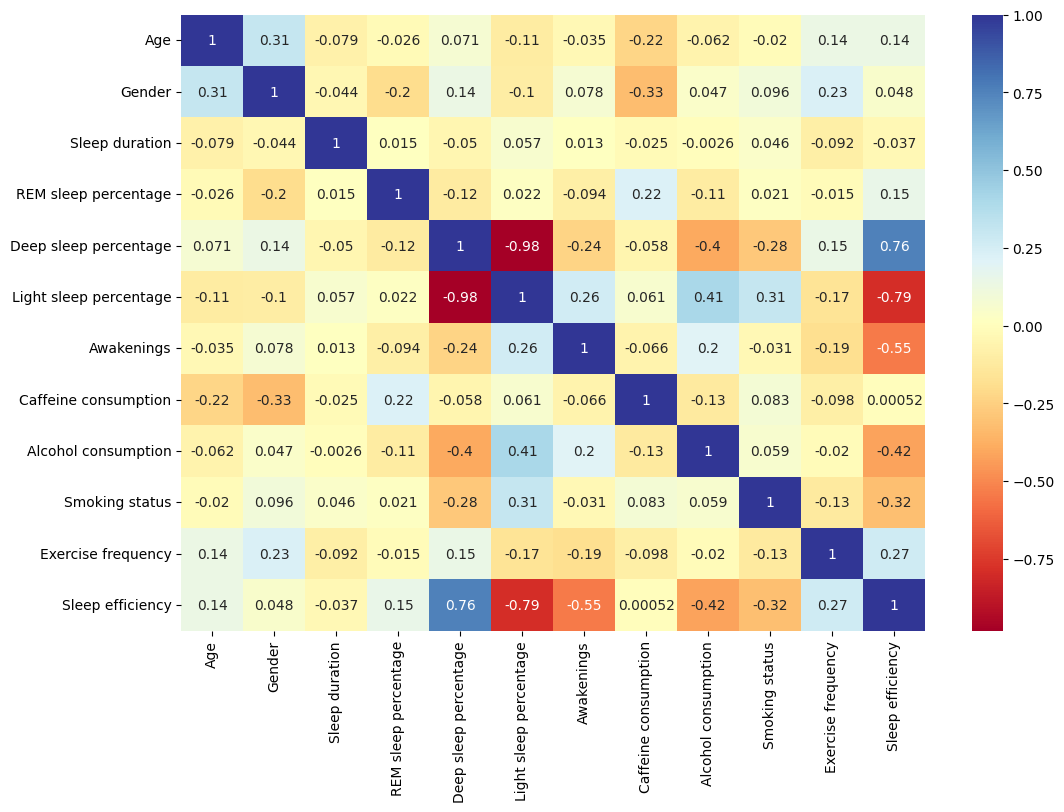

In [19]:
#heatmap of correlations in dataset
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot=True,cmap='RdYlBu')

In [20]:
# Defining the target & predictor variables
X = data.drop('Sleep efficiency',axis=1) 
y= data['Sleep efficiency'].values

In [21]:
#splitting target and predictor variables into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ***Modelling***

In [23]:
# Defining a helper function to fit models to data and score them
models = [LinearRegression(), Ridge(),RandomForestRegressor(),LGBMRegressor(),XGBRegressor(),CatBoostRegressor(),SVR()]
for i in range(7):
    models[i].fit(X_train,y_train)
    print(f'{models[i]} :')
    
    test_pred = models[i].predict(X_test)
    mae =  MAE(y_test,test_pred)
    r2 = r2_score(y_test,test_pred)
    rmse = np.sqrt(MSE(y_test,test_pred))
    print('MAE :', mae)
    print('R2_Score ',r2)
    print('RMSE ',rmse)
    print("----- ----- ----- ----- ------  -----", "\n") 

    display()

LinearRegression() :
MAE : 0.040106925666643624
R2_Score  0.833958083589806
RMSE  0.04923428102684976
----- ----- ----- ----- ------  ----- 

Ridge() :
MAE : 0.03980904726786626
R2_Score  0.834838034050473
RMSE  0.04910364750649362
----- ----- ----- ----- ------  ----- 

RandomForestRegressor() :
MAE : 0.038270630081300924
R2_Score  0.8597836324167903
RMSE  0.04524369726015218
----- ----- ----- ----- ------  ----- 

LGBMRegressor() :
MAE : 0.03772539594256527
R2_Score  0.8562134552954745
RMSE  0.04581607228972203
----- ----- ----- ----- ------  ----- 

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_thre

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [25]:
rf = RandomForestRegressor()
rf_rando = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)
rf_rando.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [26]:
rf_rando.best_params_

{'n_estimators': 1600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [27]:
predictions = rf_rando.predict(X_test)

In [28]:
# Calculate and display the MSE, MAE and RMSE for both the training and testing sets rounded to the nearest 2 decimal places
print("Training MSE is " + str(round(MSE(y_train, rf_rando.predict(X_train)), 2)))
print("Testing MSE is " + str(round(MSE(y_test, predictions), 2)))
print("\nTraining MAE is " + str(round(MAE(y_train, rf_rando.predict(X_train)), 2)))
print("Testing MAE is " + str(round(MAE(y_test, predictions), 2)))
print("\nTraining RMSE is " + str(round(np.sqrt(MSE(y_train, rf_rando.predict(X_train))), 2)))
print("Testing RMSE is " + str(round(np.sqrt(MSE(y_test, predictions)), 2)))

# Print the first 5 rows of the predictions and actual values (rounded to 2 decimal places)
print("\nThe first 5 predictions are " + str(np.round(predictions[:5], 2)))
print("The first 5 actual values are " + str(np.round(y_test[:5], 2)))


Training MSE is 0.0
Testing MSE is 0.0

Training MAE is 0.03
Testing MAE is 0.04

Training RMSE is 0.03
Testing RMSE is 0.05

The first 5 predictions are [0.77 0.92 0.55 0.9  0.87]
The first 5 actual values are [0.76 0.93 0.54 0.87 0.86]


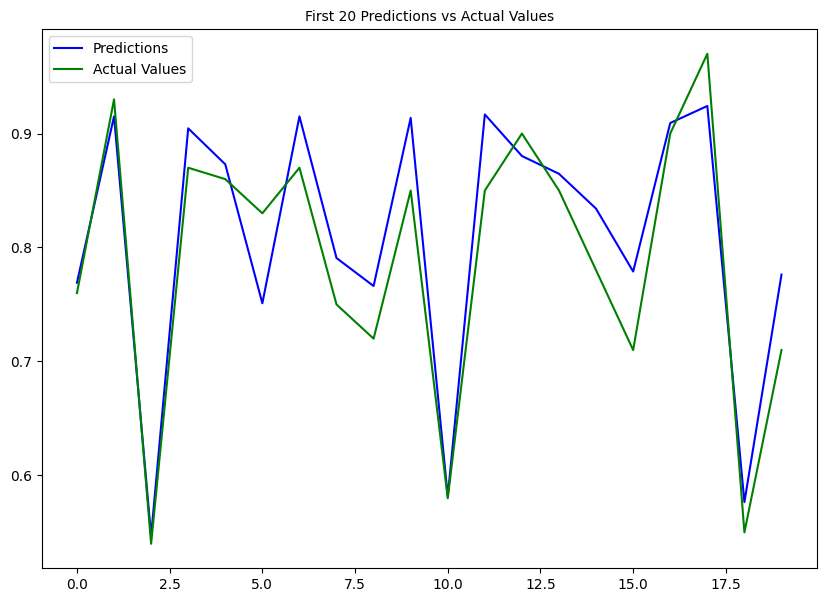

In [29]:
# Usine a line graph plot the first 50 predictions in one color and the first 50 actual values in another color with a plot size of 10 by 10
plt.figure(figsize=(10,7))
plt.plot(predictions[:20], color='blue', label='Predictions')
plt.plot(y_test[:20], color='green', label='Actual Values')

# Set the title of the plot in fontsize 20
plt.title('First 20 Predictions vs Actual Values', fontsize=10)

# Show legend
plt.legend()

# Show the plot
plt.show()
